In [1]:
import numpy as np
from matplotlib import pyplot as plt
from smc_model import *
from smc_parameters import *
from scipy.integrate import solve_ivp
import matplotlib
from matplotlib import rc


In [2]:
smc_steady = smc_model()

# balance the ODEs, excluding to ECS because it is implicitly balanced

In [3]:
new_params = smc_steady.params.copy()
del new_params['g_leak_mit']
del new_params['g_leak_ecs']
#del new_params['k_leak_er']
new_params['k_leak_er'] = 0
#new_params['g_leak_ecs'] = 0
del new_params['[SERCA]']
#new_params['Qpmca'] = 1
new_params['Qryr']  = 2.0
new_params['Qip3r']  = .0002


new_state = smc_steady.initial_state.copy()
del new_state['IP3']
del new_state['IP3RX00']
del new_state['IP3RX10']
del new_state['IP3RX01']
del new_state['RyRR10']
del new_state['RyRR11']
del new_state['RyRR01']
del new_state['MyoMp']
del new_state['MyoAM']
del new_state['MyoAMp']
del new_state['G']

fitted_init, fitted_params = smc_steady.balance(new_state,new_params,excludedODEs = ['Ca_ecs','Ca_er','Ca_cyt','Phi_ecs','Ca_mit_source','Ca_ecs_source'],includedJs = ['er_cyt','ecs_cyt'])

if fitted_init is not None:
    for k, v in fitted_init.items():
        new_state[k] = v

    for k,v in fitted_params.items():
        new_params[k] = v

    print (fitted_init, fitted_params)

{'RyRR10': 0.003272844453161682, 'G': 7.791273915819087e-05, 'IP3RX10': 0.1572841031640481, 'RyRR01': 0.0017756109949916652, 'IP3': 0.5345273640286793, 'MyoAM': 0.060612002959291936, 'IP3RX00': 0.46747209075621593, 'IP3RX01': 0.22833801438861626, 'RyRR11': 5.844071428483013e-06, 'MyoAMp': 0.014183208692474313, 'MyoMp': 0.01869880291294156} {'[SERCA]': 19.651243351530095, 'g_leak_mit': 0.0019329183755917355, 'g_leak_ecs': 0.0024162386103300745}


In [4]:
fitted_init

{'RyRR10': 0.003272844453161682,
 'G': 7.791273915819087e-05,
 'IP3RX10': 0.1572841031640481,
 'RyRR01': 0.0017756109949916652,
 'IP3': 0.5345273640286793,
 'MyoAM': 0.060612002959291936,
 'IP3RX00': 0.46747209075621593,
 'IP3RX01': 0.22833801438861626,
 'RyRR11': 5.844071428483013e-06,
 'MyoAMp': 0.014183208692474313,
 'MyoMp': 0.01869880291294156}

In [5]:
fitted_params

{'[SERCA]': 19.651243351530095,
 'g_leak_mit': 0.0019329183755917355,
 'g_leak_ecs': 0.0024162386103300745}

In [6]:
smc_steady.ODEs(new_state,0,new_params,fix=['Ca_mit','Ca_ecs'])

{'dot': defaultdict(numpy.float64,
             {'G': 0.0,
              'IP3': -5.0133508455729725e-16,
              'IP3RX00': -1.0939027461631667e-12,
              'IP3RX10': 1.123434678618196e-12,
              'IP3RX01': -1.7927881401647028e-12,
              'RyRR10': 0.0,
              'RyRR11': 0.0,
              'RyRR01': 0.0,
              'MyoMp': 0.0,
              'MyoAMp': 0.0,
              'MyoAM': 0.0,
              'Ca_cyt': -3.837972732348961e-18,
              'Ca_er': 1.2496200916206717e-15,
              'Ca_ecs': 0,
              'Ca_mit': 0,
              'Ca_ecs_source': -2.7755575615628914e-17,
              'Ca_mit_source': -0.0,
              'Phi_ecs': 0.0}),
 'J': defaultdict(numpy.float64,
             {'serca': -0.012081874918310578,
              'ipr': 0.001372506405881892,
              'ryr': 0.01070936851242827,
              'leak_mit': -0.3092669400946777,
              'mcu': -0.02260145313557993,
              'nclx_mit': 0.33186839323025763,


In [7]:
elevated_state = new_state.copy()
elevated_state['Ca_mit'] = .18

smc_elevated = smc_model(elevated_state,new_params)
#smc_steady.ODEs(elevated_state,0,new_params,fix=['Ca_mit','Ca_ecs'])

In [8]:
out = smc_elevated.solve_model(t=[0,60*60],solver='BDF')


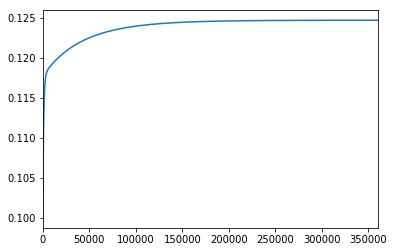

In [9]:
out['Ca_cyt'].plot()

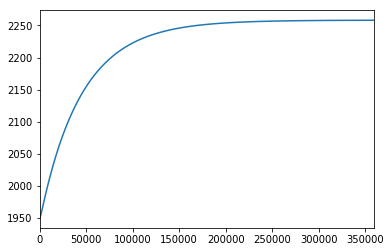

In [10]:
out['other_Ca_er_tot'].plot()

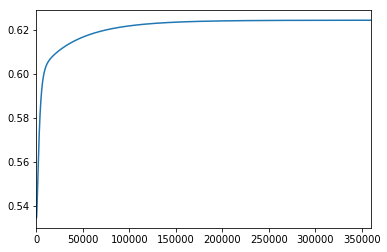

In [11]:
out['IP3'].plot()

Text(0.5, 1.0, 'Fraction of attached cross-bridges')

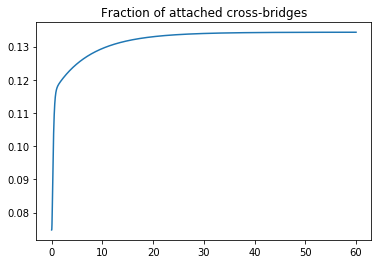

In [12]:
plt.plot(out['t']/60,(out['MyoAMp'] + out['MyoAM'] ) )
plt.title("Fraction of attached cross-bridges")

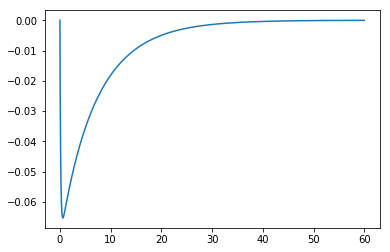

In [13]:
plt.plot(out['t']/60,(out['J_er_cyt'] ) )


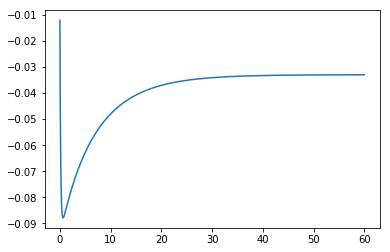

In [14]:
plt.plot(out['t']/60,(out['J_serca'] ) )


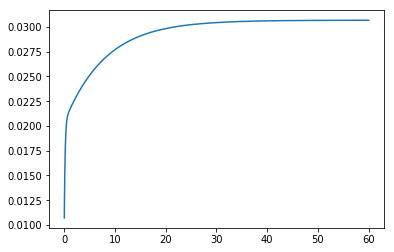

In [15]:
plt.plot(out['t']/60,(out['J_ryr'] ) )


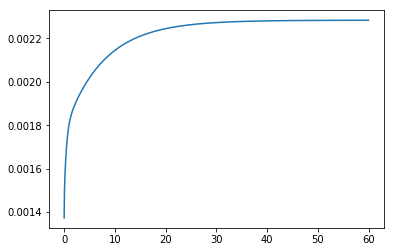

In [16]:
plt.plot(out['t']/60,(out['J_ipr'] ) )


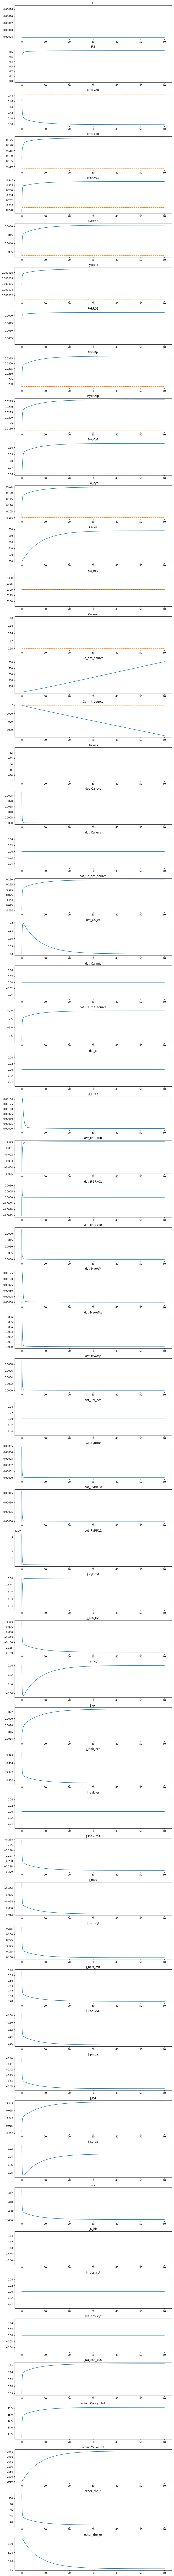

In [17]:
state_vars = list(out.columns)
state_vars.remove('t')

fig = plt.figure(constrained_layout=True, figsize = (10,2.5*out.shape[1]))
spec4 = fig.add_gridspec(ncols=1, nrows=len(state_vars))
ax = []
for j,var in enumerate(state_vars):
    ax += [fig.add_subplot(spec4[j])]
    ax[-1].plot(out['t']/60,out[var])
    try:
        ax[-1].plot(out['t']/60,default_state[var]*np.ones(out.shape[0]),linestyle='dashed')
    except:
        pass
    ax[-1].set_title(var)
    